# Pokemon Market Analysis 
* Physical Cards, English Only, Retail Pricing

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

In [121]:
dfp = pd.read_excel('../data/dataPokemon/cardsPokemon101525.xlsx')
# see all columns
pd.set_option('display.max_columns', None)
dfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43983 entries, 0 to 43982
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Source.Name     43983 non-null  object        
 1   productId       43983 non-null  int64         
 2   name            43983 non-null  object        
 3   cleanName       43981 non-null  object        
 4   imageUrl        43983 non-null  object        
 5   categoryId      43983 non-null  int64         
 6   groupId         43983 non-null  int64         
 7   url             43983 non-null  object        
 8   modifiedOn      43983 non-null  datetime64[ns]
 9   imageCount      43983 non-null  int64         
 10  extNumber       39675 non-null  object        
 11  extRarity       41396 non-null  object        
 12  extCardType     39710 non-null  object        
 13  extHP           32874 non-null  float64       
 14  extStage        32831 non-null  object        
 15  ex

In [122]:
dfp.shape

(43983, 28)

In [123]:
dfp.columns

Index(['Source.Name', 'productId', 'name', 'cleanName', 'imageUrl',
       'categoryId', 'groupId', 'url', 'modifiedOn', 'imageCount', 'extNumber',
       'extRarity', 'extCardType', 'extHP', 'extStage', 'extCardText',
       'extAttack1', 'extWeakness', 'extRetreatCost', 'lowPrice', 'midPrice',
       'highPrice', 'marketPrice', 'directLowPrice', 'subTypeName',
       'extResistance', 'extAttack2', 'extAttack3'],
      dtype='object')

In [124]:
dfp = dfp.rename(columns = {"Source.Name" : "sourceName"})

In [125]:
# Specify the needed columns
# extNumber will be used to identify single cards vs all other products (basic energy cards, boosters, code cards, figurines, decks, tins, etc.)
dfp = dfp[["sourceName", "productId", "cleanName", "groupId", "extNumber", "extRarity", "extCardType", "marketPrice", "subTypeName"]]
dfp

,sourceName,productId,cleanName,groupId,extNumber,extRarity,extCardType,marketPrice,subTypeName
0,AlternateArtPromosProductsAndPrices.csv,131695,M Lucario EX 55a 111,1938,055a/111,Promo,Fighting,96.56,Holofoil
1,AlternateArtPromosProductsAndPrices.csv,131696,M Manectric EX 24a 119,1938,024a/119,Promo,Lightning,21.29,Holofoil
2,AlternateArtPromosProductsAndPrices.csv,131697,Jolteon EX 28a 83,1938,028a/083,Promo,Lightning,26.92,Holofoil
3,AlternateArtPromosProductsAndPrices.csv,131698,Zygarde EX 54a 124,1938,054a/124,Promo,Fighting,70.98,Holofoil
4,AlternateArtPromosProductsAndPrices.csv,133813,Professor Sycamore 107a 122 Holofoil,1938,107a/122,Promo,Supporter,0.71,Holofoil
...,...,...,...,...,...,...,...,...,...
43978,XYTrainerKitSylveonAndNoivernProductsAndPrices...,98022,Psychic Energy 25,1532,25/30,Common,Basic Energy,0.28,Normal
43979,XYTrainerKitSylveonAndNoivernProductsAndPrices...,98023,Potion 27 Noivern,1532,27/30,Common,Item,0.18,Normal
43980,XYTrainerKitSylveonAndNoivernProductsAndPrices...,98024,Switch Noivern,1532,4/30,Common,Item,0.26,Normal
43981,XYTrainerKitSylveonAndNoivernProductsAndPrices...,98025,Noivern 30 Holo,1532,30/30,Common,Dragon,0.99,Holofoil


In [126]:
# identify null values for the newly specified df columns
dfp.isnull().sum()

sourceName        0
productId         0
cleanName         2
groupId           0
extNumber      4308
extRarity      2587
extCardType    4273
marketPrice    2170
subTypeName    1252
dtype: int64

In [127]:
# using the extNumber mentioned earlier
# First convert null to NaN then drop
dfp['extNumber'].replace('', np.nan, inplace=True)

C:\Users\arsta\AppData\Local\Temp\ipykernel_31864\2091277036.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfp['extNumber'].replace('', np.nan, inplace=True)


In [128]:
dfp.dropna(subset=['extNumber'], inplace = True)

In [129]:
dfp.isnull().sum()

sourceName       0
productId        0
cleanName        0
groupId          0
extNumber        0
extRarity        0
extCardType    492
marketPrice    673
subTypeName    371
dtype: int64

* The remaining nulls are from the source data and are randomly missing from extCardType, marketPrice, and subTypeName.
* That means that a small subset of cards will not have a market price but less than 1.7% of total cards at the most.

In [130]:
# Check for duplicated rows
dfp.duplicated(keep=False).sum()

np.int64(0)

In [131]:
dfp.to_csv("../data/dataPokemon/cardsPokemonClean.csv", index = False)

Merging group information next

In [132]:
# Number of unique groups
dfp["sourceName"].nunique()

205

In [133]:
groupDfp = pd.read_csv('../data/dataPokemon/groupsPokemon.csv')
groupDfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   groupId         210 non-null    int64 
 1   name            210 non-null    object
 2   abbreviation    206 non-null    object
 3   isSupplemental  210 non-null    bool  
 4   publishedOn     210 non-null    object
 5   modifiedOn      210 non-null    object
 6   categoryId      210 non-null    int64 
dtypes: bool(1), int64(2), object(4)
memory usage: 10.2+ KB


In [134]:
groupDfp = groupDfp[["groupId", "name", "abbreviation", "publishedOn"]]

groupDfp

,groupId,name,abbreviation,publishedOn
0,24448,ME02: Phantasmal Flames,PFL,2025-11-14T00:00:00
1,24451,ME: Mega Evolution Promo,MEP,2025-09-26T00:00:00
2,24380,ME01: Mega Evolution,MEG,2025-09-26T00:00:00
3,24461,MEE: Mega Evolution Energies,MEE,2025-09-26T00:00:00
4,24325,SV: Black Bolt,BLK,2025-07-18T00:00:00
...,...,...,...,...
205,1439,POP Series 5,POP,2025-10-14T20:00:06.3019497Z
206,1432,POP Series 6,POP,2025-10-14T20:00:06.3019497Z
207,1414,POP Series 7,POP,2025-10-14T20:00:06.3019497Z
208,1450,POP Series 8,POP,2025-10-14T20:00:06.3019497Z


In [135]:
groupDfp = groupDfp.rename(columns = {"name" : "groupName", "abbreviation" : "groupCode", "publishedOn" : "releaseDate"})
groupDfp

,groupId,groupName,groupCode,releaseDate
0,24448,ME02: Phantasmal Flames,PFL,2025-11-14T00:00:00
1,24451,ME: Mega Evolution Promo,MEP,2025-09-26T00:00:00
2,24380,ME01: Mega Evolution,MEG,2025-09-26T00:00:00
3,24461,MEE: Mega Evolution Energies,MEE,2025-09-26T00:00:00
4,24325,SV: Black Bolt,BLK,2025-07-18T00:00:00
...,...,...,...,...
205,1439,POP Series 5,POP,2025-10-14T20:00:06.3019497Z
206,1432,POP Series 6,POP,2025-10-14T20:00:06.3019497Z
207,1414,POP Series 7,POP,2025-10-14T20:00:06.3019497Z
208,1450,POP Series 8,POP,2025-10-14T20:00:06.3019497Z


In [136]:
groupDfp.isna().sum()

groupId        0
groupName      0
groupCode      4
releaseDate    0
dtype: int64

There are 4 NaN Group Codes from origin data. Since codes are universal and static once established, it is relatively safe to fill them in using precedent.

In [137]:
groupDfp.loc[20, 'groupCode'] = 'MYFB'
groupDfp.loc[31, 'groupCode'] = 'PPSC'
groupDfp.loc[123, 'groupCode'] = 'MCD12'
groupDfp.loc[129, 'groupCode'] = 'MCD11'

In [138]:
groupDfp.isna().sum()

groupId        0
groupName      0
groupCode      0
releaseDate    0
dtype: int64

In [139]:
groupDfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   groupId      210 non-null    int64 
 1   groupName    210 non-null    object
 2   groupCode    210 non-null    object
 3   releaseDate  210 non-null    object
dtypes: int64(1), object(3)
memory usage: 6.7+ KB


In [140]:
# to standardize and convert the releaseDate field entries to datetime
# https://docs.python.org/3/library/re.html
# re.sub(pattern, repl, string, count=0, flags=0)


def clean_and_parse_dates(date_str):
    if pd.isna(date_str):
        return pd.NaT
    date_str = re.sub(r'(\.\d{6})\d*Z$', r'\1', date_str)  # trim after 6 digits
    date_str = re.sub(r'Z$', '', date_str)  # remove Z if still present
    try:
        return pd.to_datetime(date_str, utc=True)
    except Exception:
        return pd.NaT


In [141]:
groupDfp['releaseDate'] = groupDfp['releaseDate'].apply(clean_and_parse_dates)
groupDfp

,groupId,groupName,groupCode,releaseDate
0,24448,ME02: Phantasmal Flames,PFL,2025-11-14 00:00:00+00:00
1,24451,ME: Mega Evolution Promo,MEP,2025-09-26 00:00:00+00:00
2,24380,ME01: Mega Evolution,MEG,2025-09-26 00:00:00+00:00
3,24461,MEE: Mega Evolution Energies,MEE,2025-09-26 00:00:00+00:00
4,24325,SV: Black Bolt,BLK,2025-07-18 00:00:00+00:00
...,...,...,...,...
205,1439,POP Series 5,POP,2025-10-14 20:00:06.301949+00:00
206,1432,POP Series 6,POP,2025-10-14 20:00:06.301949+00:00
207,1414,POP Series 7,POP,2025-10-14 20:00:06.301949+00:00
208,1450,POP Series 8,POP,2025-10-14 20:00:06.301949+00:00


In [142]:
groupDfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   groupId      210 non-null    int64              
 1   groupName    210 non-null    object             
 2   groupCode    210 non-null    object             
 3   releaseDate  210 non-null    datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), int64(1), object(2)
memory usage: 6.7+ KB


In [143]:
# Drop timezone (make native datetime) and normalize to remove time info
groupDfp['releaseDate'] = groupDfp['releaseDate'].dt.tz_convert(None).dt.normalize()
groupDfp

,groupId,groupName,groupCode,releaseDate
0,24448,ME02: Phantasmal Flames,PFL,2025-11-14
1,24451,ME: Mega Evolution Promo,MEP,2025-09-26
2,24380,ME01: Mega Evolution,MEG,2025-09-26
3,24461,MEE: Mega Evolution Energies,MEE,2025-09-26
4,24325,SV: Black Bolt,BLK,2025-07-18
...,...,...,...,...
205,1439,POP Series 5,POP,2025-10-14
206,1432,POP Series 6,POP,2025-10-14
207,1414,POP Series 7,POP,2025-10-14
208,1450,POP Series 8,POP,2025-10-14


In [144]:
groupDfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   groupId      210 non-null    int64         
 1   groupName    210 non-null    object        
 2   groupCode    210 non-null    object        
 3   releaseDate  210 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 6.7+ KB


In [145]:
# create and insert a releaseYear column for plotting later
groupDfp['releaseYear'] = groupDfp['releaseDate'].dt.year
groupDfp

,groupId,groupName,groupCode,releaseDate,releaseYear
0,24448,ME02: Phantasmal Flames,PFL,2025-11-14,2025
1,24451,ME: Mega Evolution Promo,MEP,2025-09-26,2025
2,24380,ME01: Mega Evolution,MEG,2025-09-26,2025
3,24461,MEE: Mega Evolution Energies,MEE,2025-09-26,2025
4,24325,SV: Black Bolt,BLK,2025-07-18,2025
...,...,...,...,...,...
205,1439,POP Series 5,POP,2025-10-14,2025
206,1432,POP Series 6,POP,2025-10-14,2025
207,1414,POP Series 7,POP,2025-10-14,2025
208,1450,POP Series 8,POP,2025-10-14,2025


In [146]:
groupDfp.to_csv("../data/dataPokemon/groupsPokemonClean.csv", index = False)

In [147]:
dfp2 = pd.merge(dfp, groupDfp, on = "groupId", how = "inner")
dfp2

,sourceName,productId,cleanName,groupId,extNumber,extRarity,extCardType,marketPrice,subTypeName,groupName,groupCode,releaseDate,releaseYear
0,AlternateArtPromosProductsAndPrices.csv,131695,M Lucario EX 55a 111,1938,055a/111,Promo,Fighting,96.56,Holofoil,Alternate Art Promos,PR,2017-05-19,2017
1,AlternateArtPromosProductsAndPrices.csv,131696,M Manectric EX 24a 119,1938,024a/119,Promo,Lightning,21.29,Holofoil,Alternate Art Promos,PR,2017-05-19,2017
2,AlternateArtPromosProductsAndPrices.csv,131697,Jolteon EX 28a 83,1938,028a/083,Promo,Lightning,26.92,Holofoil,Alternate Art Promos,PR,2017-05-19,2017
3,AlternateArtPromosProductsAndPrices.csv,131698,Zygarde EX 54a 124,1938,054a/124,Promo,Fighting,70.98,Holofoil,Alternate Art Promos,PR,2017-05-19,2017
4,AlternateArtPromosProductsAndPrices.csv,133813,Professor Sycamore 107a 122 Holofoil,1938,107a/122,Promo,Supporter,0.71,Holofoil,Alternate Art Promos,PR,2017-05-19,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39670,XYTrainerKitSylveonAndNoivernProductsAndPrices...,98021,Professors Letter Noivern,1532,24/30,Common,Item,0.91,Normal,XY Trainer Kit: Sylveon & Noivern,PR,2014-03-12,2014
39671,XYTrainerKitSylveonAndNoivernProductsAndPrices...,98022,Psychic Energy 25,1532,25/30,Common,Basic Energy,0.28,Normal,XY Trainer Kit: Sylveon & Noivern,PR,2014-03-12,2014
39672,XYTrainerKitSylveonAndNoivernProductsAndPrices...,98023,Potion 27 Noivern,1532,27/30,Common,Item,0.18,Normal,XY Trainer Kit: Sylveon & Noivern,PR,2014-03-12,2014
39673,XYTrainerKitSylveonAndNoivernProductsAndPrices...,98024,Switch Noivern,1532,4/30,Common,Item,0.26,Normal,XY Trainer Kit: Sylveon & Noivern,PR,2014-03-12,2014


In [148]:
# check for dupes again
dfp2.duplicated(keep=False).sum()

np.int64(0)

In [149]:
# drop sourceName now that we have groupName
dfp2.drop(columns = ["sourceName"], inplace = True)
dfp2

,productId,cleanName,groupId,extNumber,extRarity,extCardType,marketPrice,subTypeName,groupName,groupCode,releaseDate,releaseYear
0,131695,M Lucario EX 55a 111,1938,055a/111,Promo,Fighting,96.56,Holofoil,Alternate Art Promos,PR,2017-05-19,2017
1,131696,M Manectric EX 24a 119,1938,024a/119,Promo,Lightning,21.29,Holofoil,Alternate Art Promos,PR,2017-05-19,2017
2,131697,Jolteon EX 28a 83,1938,028a/083,Promo,Lightning,26.92,Holofoil,Alternate Art Promos,PR,2017-05-19,2017
3,131698,Zygarde EX 54a 124,1938,054a/124,Promo,Fighting,70.98,Holofoil,Alternate Art Promos,PR,2017-05-19,2017
4,133813,Professor Sycamore 107a 122 Holofoil,1938,107a/122,Promo,Supporter,0.71,Holofoil,Alternate Art Promos,PR,2017-05-19,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
39670,98021,Professors Letter Noivern,1532,24/30,Common,Item,0.91,Normal,XY Trainer Kit: Sylveon & Noivern,PR,2014-03-12,2014
39671,98022,Psychic Energy 25,1532,25/30,Common,Basic Energy,0.28,Normal,XY Trainer Kit: Sylveon & Noivern,PR,2014-03-12,2014
39672,98023,Potion 27 Noivern,1532,27/30,Common,Item,0.18,Normal,XY Trainer Kit: Sylveon & Noivern,PR,2014-03-12,2014
39673,98024,Switch Noivern,1532,4/30,Common,Item,0.26,Normal,XY Trainer Kit: Sylveon & Noivern,PR,2014-03-12,2014


In [150]:
# check to make sure for no NA values after merges
dfp2.isna().sum()

productId        0
cleanName        0
groupId          0
extNumber        0
extRarity        0
extCardType    492
marketPrice    673
subTypeName    371
groupName        0
groupCode        0
releaseDate      0
releaseYear      0
dtype: int64

In [151]:
# A more viewer-friendly order
newOrderP = ['cleanName', 'groupId', 'groupName', 'productId', 'subTypeName', 'extCardType', 'extNumber', 'extRarity', 'releaseDate', 'releaseYear', 'marketPrice']
dfp2 = dfp2[newOrderP]
dfp2.head()

,cleanName,groupId,groupName,productId,subTypeName,extCardType,extNumber,extRarity,releaseDate,releaseYear,marketPrice
0,M Lucario EX 55a 111,1938,Alternate Art Promos,131695,Holofoil,Fighting,055a/111,Promo,2017-05-19,2017,96.56
1,M Manectric EX 24a 119,1938,Alternate Art Promos,131696,Holofoil,Lightning,024a/119,Promo,2017-05-19,2017,21.29
2,Jolteon EX 28a 83,1938,Alternate Art Promos,131697,Holofoil,Lightning,028a/083,Promo,2017-05-19,2017,26.92
3,Zygarde EX 54a 124,1938,Alternate Art Promos,131698,Holofoil,Fighting,054a/124,Promo,2017-05-19,2017,70.98
4,Professor Sycamore 107a 122 Holofoil,1938,Alternate Art Promos,133813,Holofoil,Supporter,107a/122,Promo,2017-05-19,2017,0.71


In [152]:
# Order by releaseDate, then groupName, then cleanName

dfp2 = dfp2.sort_values(by=["releaseDate", "groupName", "cleanName"])
dfp2.head()

,cleanName,groupId,groupName,productId,subTypeName,extCardType,extNumber,extRarity,releaseDate,releaseYear,marketPrice
1879,Aggron 80 124 Cosmos Holo,2289,Blister Exclusives,251183,Holofoil,Metal,080/124,Promo,1998-02-27,1998,12.01
1901,Alakazam 082 167 Cosmos Holo,2289,Blister Exclusives,620227,Holofoil,Psychic,082/167,Rare,1998-02-27,1998,2.33
1817,Alolan Dugtrio 87 149 Cosmos Holo,2289,Blister Exclusives,173106,Holofoil,Metal,087/149,Promo,1998-02-27,1998,2.36
1811,Alolan Golem 42 145 Cosmos Holo,2289,Blister Exclusives,173100,Holofoil,Lightning,042/145,Promo,1998-02-27,1998,1.96
1815,Alolan Muk 58 149 Cosmos Holo,2289,Blister Exclusives,173104,Holofoil,Psychic,058/149,Promo,1998-02-27,1998,4.12


In [153]:
# Reset index after manipulation and to check new number of rows
# Dropping the original index column

dfp2 = dfp2.reset_index(drop = True)
dfp2.head()

,cleanName,groupId,groupName,productId,subTypeName,extCardType,extNumber,extRarity,releaseDate,releaseYear,marketPrice
0,Aggron 80 124 Cosmos Holo,2289,Blister Exclusives,251183,Holofoil,Metal,080/124,Promo,1998-02-27,1998,12.01
1,Alakazam 082 167 Cosmos Holo,2289,Blister Exclusives,620227,Holofoil,Psychic,082/167,Rare,1998-02-27,1998,2.33
2,Alolan Dugtrio 87 149 Cosmos Holo,2289,Blister Exclusives,173106,Holofoil,Metal,087/149,Promo,1998-02-27,1998,2.36
3,Alolan Golem 42 145 Cosmos Holo,2289,Blister Exclusives,173100,Holofoil,Lightning,042/145,Promo,1998-02-27,1998,1.96
4,Alolan Muk 58 149 Cosmos Holo,2289,Blister Exclusives,173104,Holofoil,Psychic,058/149,Promo,1998-02-27,1998,4.12


In [154]:
dfp2.shape

(39675, 11)

* We started with ~44k rows x 28 columns and now ~40k rows x 11 columns.

In [155]:
# Checking name lookup for reference
dfp2[dfp2["cleanName"] == "Charizard"]

,cleanName,groupId,groupName,productId,subTypeName,extCardType,extNumber,extRarity,releaseDate,releaseYear,marketPrice
140,Charizard,604,Base Set,42382,Holofoil,Fire,004/102,Holo Rare,1999-01-09,1999,457.99
251,Charizard,1663,Base Set (Shadowless),106999,Unlimited Holofoil,Fire,004/102,Holo Rare,1999-01-09,1999,1923.19
836,Charizard,605,Base Set 2,42479,Holofoil,Fire,004/130,Holo Rare,2000-02-24,2000,304.88
2279,Charizard,1374,Legendary Collection,84196,Holofoil,Fire,003/110,Holo Rare,2002-05-24,2002,389.99
2280,Charizard,1374,Legendary Collection,84196,Reverse Holofoil,Fire,003/110,Holo Rare,2002-05-24,2002,NaN
3168,Charizard,1372,Skyridge,84186,Reverse Holofoil,Colorless,146/144,Secret Rare,2003-05-12,2003,NaN
3867,Charizard,1376,Dragon,84187,Holofoil,Fire,100/97,Secret Rare,2003-11-24,2003,739.97
6583,Charizard,1383,Power Keepers,84188,Holofoil,Fire,6/108,Holo Rare,2007-02-01,2007,137.52
6584,Charizard,1383,Power Keepers,84188,Reverse Holofoil,Fire,6/108,Holo Rare,2007-02-01,2007,119.09
7365,Charizard,1380,Secret Wonders,84189,Holofoil,Fire,3/132,Holo Rare,2007-11-07,2007,126.80


In [156]:
dfp2.to_csv("../data/dataPokemon/completePokemonClean.csv", index = False)

* Now that we have our data frame, let's plot some graphs to start developing insights.

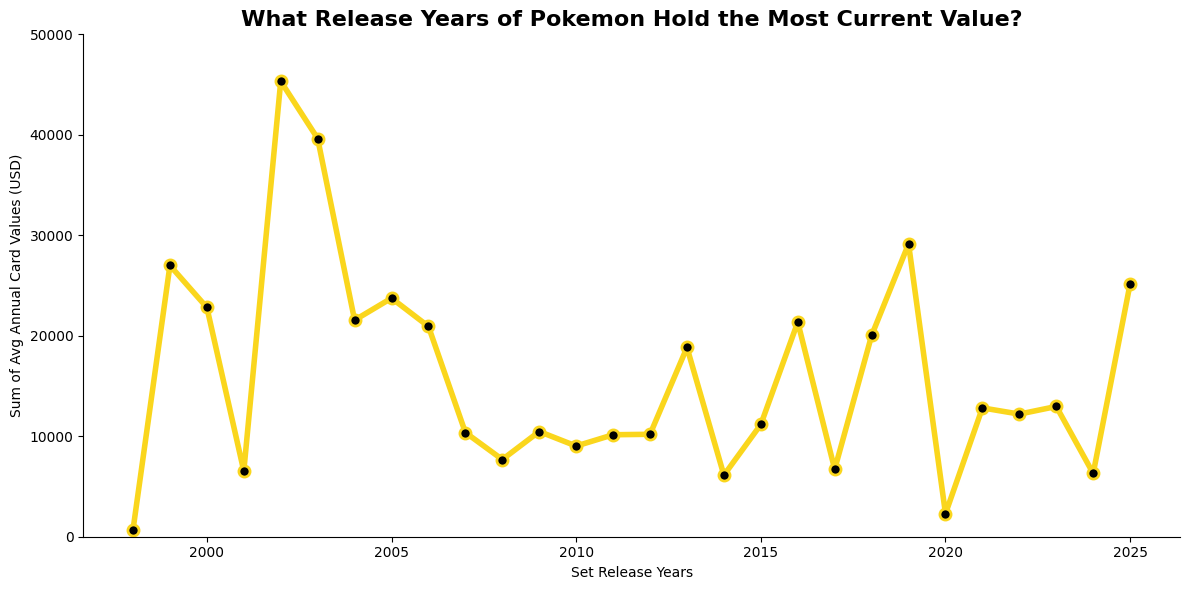

In [161]:
plt.figure(figsize=(12,6))

sumPerYearPokemon = dfp2.groupby("releaseYear")["marketPrice"].sum().reset_index()

plt.plot(sumPerYearPokemon["releaseYear"], sumPerYearPokemon["marketPrice"], color="#FAD61D", linewidth=4, marker="o", markersize = 8, markerfacecolor = "#000000", markeredgewidth = 2)
plt.ylim(0, 50000)
plt.xlabel("Set Release Years")
plt.ylabel("Sum of Avg Annual Card Values (USD)")

plt.title("What Release Years of Pokemon Hold the Most Current Value?", fontsize=16, fontweight="bold", color="black")

ax = plt.gca()

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout()
plt.show()